# 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('./new_data.csv', encoding = 'CP949', engine = 'python')
df

,score,review
0,1,최악의 쓰레기 영화
1,1,나를 화나게 만든영화
2,1,10점주는새끼들 뇌없냐 개념밥말나먹엇네 알바들은존나부끄럽지도않나 돈에영혼끼지팔놈들ㅉ...
3,1,감독님 그동안 무슨일이 있으셨던거에요? 이건 냉동캡슐에 있다 지금 깨어났다고 해도 ...
4,1,감독아 양심껏좀 살자!! 주겨버릴까!!
...,...,...
5666,5,그냥저냥 킬링타임용 근데 이성경이 유해진좋아하는건 너무 막장
5667,3,난 진짜 이성경 떔에 봤다 너무 매력적이야 ㅋㅋㅋ
5668,3,스무살이 좋은 철없는 꼰대들(감독 포함 작가들)의 자기만족 스토리텔링
5669,4,민감한 중년 로맨스를 그릴거면 제대로 그리던가 이도저도 아님


# 데이터 정제

In [3]:
# 특수문자 제거
df['review']=df['review'].str.replace(r'[^ ㄱ-ㅣ가-힣]+', " ")
df['review'].head()

C:\Users\user\AppData\Local\Temp/ipykernel_10008/1515878519.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review']=df['review'].str.replace(r'[^ ㄱ-ㅣ가-힣]+', " ")


0                                           최악의 쓰레기 영화
1                                          나를 화나게 만든영화
2     점주는새끼들 뇌없냐 개념밥말나먹엇네 알바들은존나부끄럽지도않나 돈에영혼끼지팔놈들ㅉㅉ...
3    감독님 그동안 무슨일이 있으셨던거에요  이건 냉동캡슐에 있다 지금 깨어났다고 해도 ...
4                                  감독아 양심껏좀 살자  주겨버릴까 
Name: review, dtype: object

In [4]:
# 공백만 남은 데이터 nan으로 처리
df['review'] = df['review'].str.replace('^ +','')
df['review'].replace('',np.nan, inplace = True)
df.isnull().sum()

C:\Users\user\AppData\Local\Temp/ipykernel_10008/2893747123.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('^ +','')


score      0
review    13
dtype: int64

In [5]:
# nan 삭제
df = df.dropna(how='any')
len(df)

5658

<AxesSubplot:>

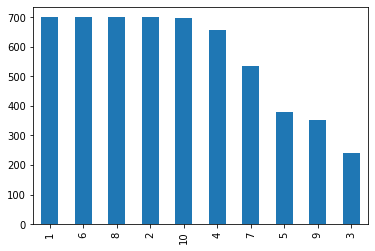

In [6]:
df['score'].value_counts().plot(kind='bar')

# 불용어 처리

In [7]:
x_data = df['review']
len(x_data)

5658

In [8]:
y_data = df['score']
len(y_data)

5658

In [9]:
# 불용어 파일
stop = pd.read_csv('./한국어불용어100.txt', sep = '\t', encoding = 'utf-8')

In [10]:
stop

,불용어,구분,id
0,이,VCP,0.018280
1,있,VA,0.011699
2,하,VV,0.009774
3,것,NNB,0.009733
4,들,XSN,0.006898
...,...,...,...
95,원,NNB,0.000492
96,잘,MAG,0.000491
97,통하,VV,0.000487
98,소리,NNG,0.000486


In [11]:
# 불용어 리스트 생성
stopword = stop['불용어'].tolist()

In [12]:
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
x_word = []
for x in x_data:
    word_tokens = kkma.morphs(x)    
    result = [word for word in word_tokens if not word in stopword]
    x_word.append(result)
    
x_word

# 정수 인코딩

In [ ]:
from keras.preprocessing.text import Tokenizer 

In [ ]:
# 토큰화
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(x_word) 
sequences = tokenizer.texts_to_sequences(x_word)
sequences

In [ ]:
word_index = tokenizer.word_index
word_index

In [ ]:
vocab_size = len(word_index)
vocab_size

# 패딩

서로 다른 샘플 길이 맞춤

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
TextMAX = max(len(l) for l in sequences)

In [ ]:
print('리뷰 최대 길이 : {}'.format(max(len(l) for l in x_data))) 
print('리뷰 평균 길이 : {}'.format(sum(map(len, x_data)) / len(x_data)))
plt.hist([len(s) for s in x_data], bins=50) 
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import utils
from keras.utils import np_utils

In [ ]:
max_len = TextMAX
x_data = sequence.pad_sequences(sequences, maxlen = max_len)
y_data = np_utils.to_categorical(y_data)

In [ ]:
x_data

In [ ]:
y_data

In [ ]:
textlen = len(x_data[0])

In [ ]:
print(x_data.shape)
print(y_data.shape)

In [ ]:
y_data = np.delete(y_data,0,axis =1)

In [ ]:
print(x_data.shape)
print(y_data.shape)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
validation_x = np.asarray(X_test)
validation_y = np.asarray(y_test)

# 모델

In [ ]:
# GRU 모델
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding


hidden_units = 512


model = Sequential()
model.add(Embedding(vocab_size +1, textlen))
model.add(GRU(hidden_units))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=10, batch_size = 30,
                   validation_data=(validation_x,validation_y))

In [ ]:
import matplotlib.pyplot as plt

train_history = history.history["loss"]
validate_history = history.history["val_loss"]
fig = plt.figure(figsize = (5,5))
plt.title("loss history")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red", label = 'train')
plt.plot(validate_history,"blue", label = 'val')
plt.legend()
plt.show()

train_history = history.history["accuracy"]
validate_history = history.history["val_accuracy"]
fig = plt.figure(figsize = (5,5))
plt.title("accuracy history")
plt.xlabel("EPOCH")
plt.ylabel("accuracy function")
plt.plot(train_history, "red", label = 'train')
plt.plot(validate_history,"blue", label = 'val')
plt.legend()
plt.show()